In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("viridis")

In [136]:
colunas_de_interesse = [
    'TP_FAIXA_ETARIA',
    'TP_SEXO',
    'TP_COR_RACA',
    'TP_ST_CONCLUSAO',
    'TP_ESCOLA',
    'SG_UF_PROVA',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_MT',
    'NU_NOTA_REDACAO',
    'TP_LINGUA', # ingles ou espanhol
    'Q001', # Escolaridade pai
    'Q002', # Escolaridade mãe
    'Q006', # Renda familiar
    'Q022', # Existência de telefone celular
    'Q024', # Possui computador
    'Q025'  # Acesso à internet
]

df = pd.read_csv(
    'dados.csv', 
    sep=';', 
    encoding='ISO-8859-1',
    usecols=colunas_de_interesse
)

In [137]:
df.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025
0,5,F,1,1,1,MG,NaN,574.6,472.6,NaN,1,760.0,F,F,D,B,B,B
1,12,M,1,1,1,AL,505.9,551.8,498.3,461.5,1,560.0,B,B,B,C,A,A
2,13,F,1,1,1,SP,NaN,NaN,NaN,NaN,1,NaN,B,C,C,C,B,B
3,3,M,3,2,2,CE,580.7,678.9,638.9,659.5,0,780.0,B,B,B,B,B,B
4,2,F,3,2,2,CE,497.7,532.4,457.6,582.6,1,780.0,D,E,C,E,B,B


In [138]:
df.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO',
       'TP_ESCOLA', 'SG_UF_PROVA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006',
       'Q022', 'Q024', 'Q025'],
      dtype='object')

In [139]:
df.shape

(3389832, 18)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TP_FAIXA_ETARIA  int64  
 1   TP_SEXO          object 
 2   TP_COR_RACA      int64  
 3   TP_ST_CONCLUSAO  int64  
 4   TP_ESCOLA        int64  
 5   SG_UF_PROVA      object 
 6   NU_NOTA_CN       float64
 7   NU_NOTA_CH       float64
 8   NU_NOTA_LC       float64
 9   NU_NOTA_MT       float64
 10  TP_LINGUA        int64  
 11  NU_NOTA_REDACAO  float64
 12  Q001             object 
 13  Q002             object 
 14  Q006             object 
 15  Q022             object 
 16  Q024             object 
 17  Q025             object 
dtypes: float64(5), int64(5), object(8)
memory usage: 465.5+ MB


In [141]:
df.isna().sum()

TP_FAIXA_ETARIA          0
TP_SEXO                  0
TP_COR_RACA              0
TP_ST_CONCLUSAO          0
TP_ESCOLA                0
SG_UF_PROVA              0
NU_NOTA_CN         1143988
NU_NOTA_CH         1011453
NU_NOTA_LC         1011453
NU_NOTA_MT         1143988
TP_LINGUA                0
NU_NOTA_REDACAO    1011453
Q001                     2
Q002                     2
Q006                     2
Q022                     2
Q024                     2
Q025                     2
dtype: int64

In [142]:
notas_col = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_MT',
    'NU_NOTA_REDACAO',
]

In [143]:
df['NOTA_MEDIA'] = df[notas_col].mean(axis=1)

# Analise univariada

## Notas

In [144]:
df[notas_col].isna().sum()

NU_NOTA_CN         1143988
NU_NOTA_CH         1011453
NU_NOTA_LC         1011453
NU_NOTA_MT         1143988
NU_NOTA_REDACAO    1011453
dtype: int64

In [145]:
df_presentes = df.dropna(subset=notas_col)

In [146]:
df_presentes[notas_col].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,2.238107e+06,2.238107e+06,2.238107e+06,2.238107e+06,2.238107e+06
mean,4.919010e+02,5.231820e+02,5.048753e+02,5.351971e+02,6.225462e+02
std,8.049976e+01,9.438626e+01,7.809703e+01,1.105777e+02,1.839687e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.311000e+02,4.489000e+02,4.501000e+02,4.448000e+02,5.200000e+02
50%,4.821000e+02,5.256000e+02,5.082000e+02,5.155000e+02,6.200000e+02
75%,5.459000e+02,5.919000e+02,5.608000e+02,6.140000e+02,7.400000e+02
max,8.671000e+02,8.469000e+02,8.261000e+02,9.531000e+02,1.000000e+03


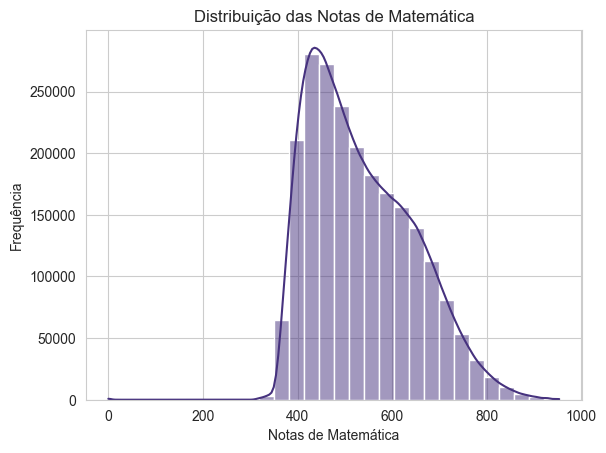

In [147]:
sns.histplot(data=df_presentes, x='NU_NOTA_MT', bins=30, kde=True)

plt.title('Distribuição das Notas de Matemática')
plt.xlabel('Notas de Matemática')
plt.ylabel('Frequência')
plt.show()


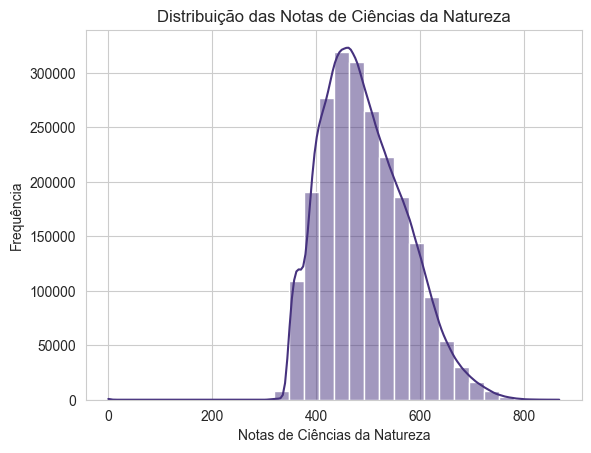

In [148]:
sns.histplot(data=df_presentes, x='NU_NOTA_CN', bins=30, kde=True)

plt.title('Distribuição das Notas de Ciências da Natureza')
plt.xlabel('Notas de Ciências da Natureza')
plt.ylabel('Frequência')
plt.show()

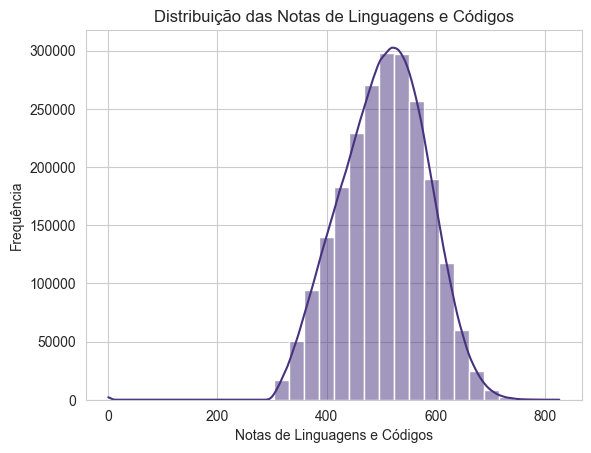

In [149]:
sns.histplot(data=df_presentes, x='NU_NOTA_LC', bins=30, kde=True)

plt.title('Distribuição das Notas de Linguagens e Códigos')
plt.xlabel('Notas de Linguagens e Códigos')
plt.ylabel('Frequência')
plt.show()

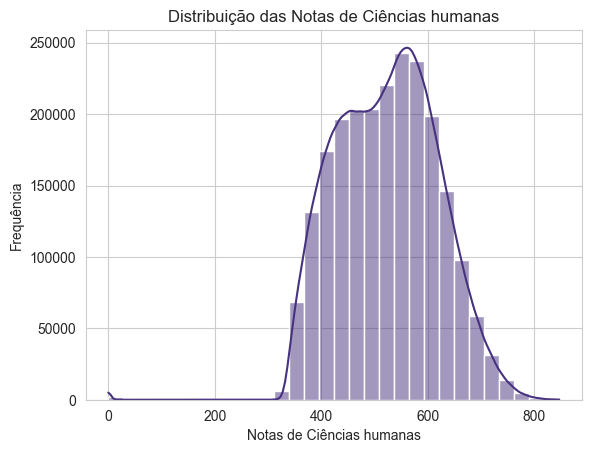

In [150]:
sns.histplot(data=df_presentes, x='NU_NOTA_CH', bins=30, kde=True)

plt.title('Distribuição das Notas de Ciências humanas')
plt.xlabel('Notas de Ciências humanas')
plt.ylabel('Frequência')
plt.show()

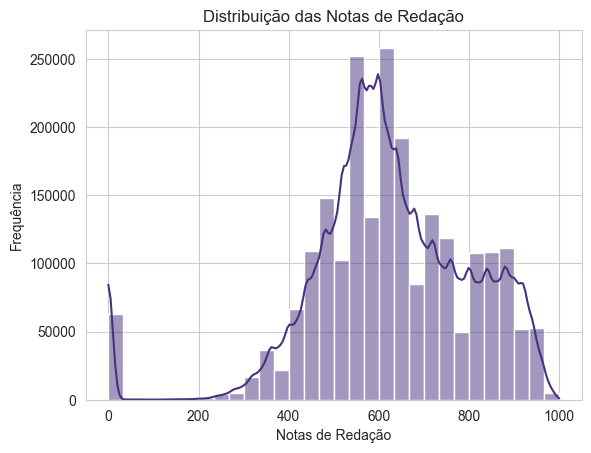

In [151]:
sns.histplot(data=df_presentes, x='NU_NOTA_REDACAO', bins=30, kde=True)

plt.title('Distribuição das Notas de Redação')
plt.xlabel('Notas de Redação')
plt.ylabel('Frequência')
plt.show()

## Variáveis Categoricas

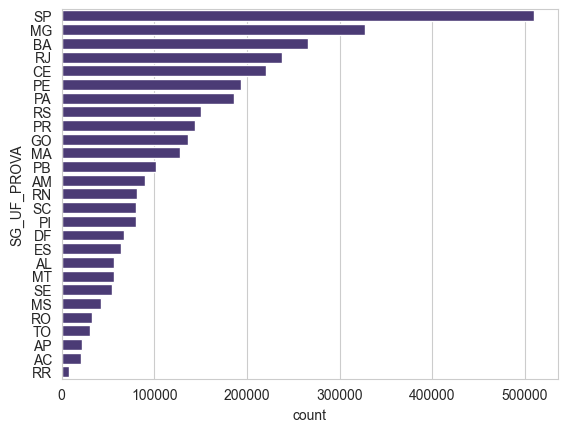

In [152]:
sns.countplot(data=df, y='SG_UF_PROVA', order=df['SG_UF_PROVA'].value_counts().index)

plt.show()

In [153]:
# Mapeamento de códigos para rótulos legíveis
map_sexo = {'M': 'Masculino', 'F': 'Feminino'}
map_cor = {0:'Não declarado',1:'Branca',2:'Preta',3:'Parda',4:'Amarela',5:'Indígena', 6: "Não dispõe da informação"}
map_lingua = {0:'Inglês',1:'Espanhol'}

# Aplica mapeamentos (sem erro se valor não estiver no dict)
df['TP_SEXO'] = df['TP_SEXO'].map(map_sexo).fillna(df['TP_SEXO'])
df['TP_COR_RACA'] = df['TP_COR_RACA'].map(map_cor).fillna(df['TP_COR_RACA'])
df['TP_LINGUA'] = df['TP_LINGUA'].map(map_lingua).fillna(df['TP_LINGUA'])


In [154]:
map_renda = {
    'A': 'Nenhuma Renda',
    'B': 'Até R$ 1.100,00',
    'C': 'De R$ 1.100,01 até R$ 1.650,00',
    'D': 'De R$ 1.650,01 até R$ 2.200,00',
    'E': 'De R$ 2.200,01 até R$ 2.750,00',
    'F': 'De R$ 2.750,01 até R$ 3.300,00',
    'G': 'De R$ 3.300,01 até R$ 3.850,00',
    'H': 'De R$ 3.850,01 até R$ 4.400,00',
    'I': 'De R$ 4.400,01 até R$ 5.500,00',
    'J': 'De R$ 5.500,01 até R$ 6.600,00',
    'K': 'De R$ 6.600,01 até R$ 7.700,00',
    'L': 'De R$ 7.700,01 até R$ 8.800,00',
    'M': 'De R$ 8.800,01 até R$ 9.900,00',
    'N': 'De R$ 9.900,01 até R$ 11.000,00',
    'O': 'De R$ 11.000,01 até R$ 13.200,00',
    'P': 'De R$ 13.200,01 até R$ 16.500,00',
    'Q': 'De R$ 16.500,01 até R$ 22.000,00',
    'R': 'Acima de R$ 22.000,00'
}

df['Q006'] = df['Q006'].map(map_renda).fillna(df['Q006'])

In [155]:
# Limpeza e derivação
notas_col = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_MT',
    'NU_NOTA_REDACAO',
]
# Recalcula média (garante consistência)
df['NOTA_MEDIA'] = df[notas_col].mean(axis=1)

# Remove registros com notas negativas (se existirem) e mantém somente presentes nas provas
cond_notas_validas = (df[notas_col] >= 0).all(axis=1)
df_clean = df.loc[cond_notas_validas].dropna(subset=notas_col)


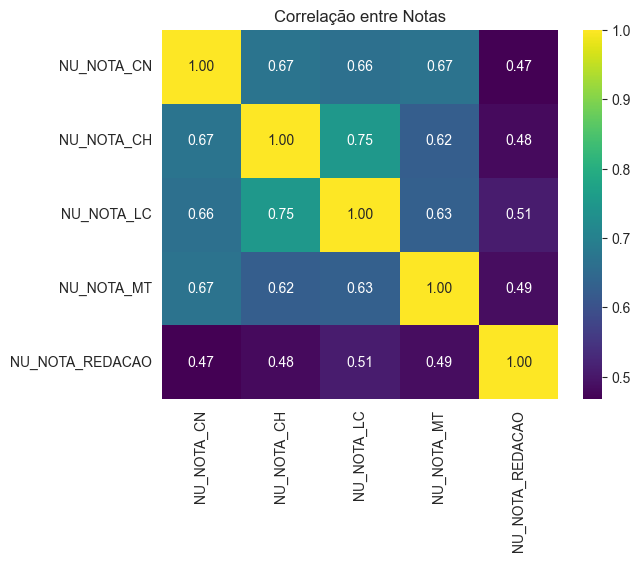

In [156]:
# Correlação entre notas
corr = df_clean[notas_col].corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlação entre Notas')
plt.show()


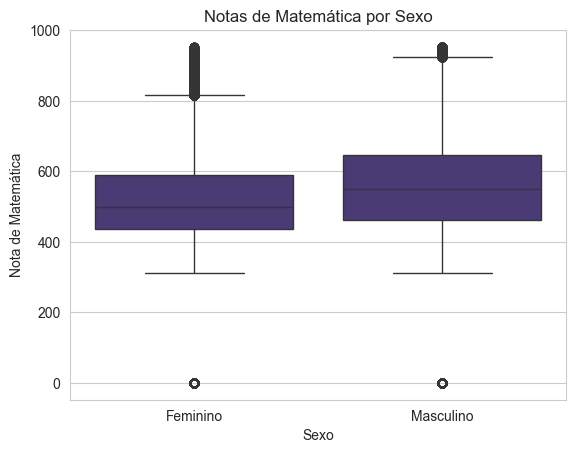

In [157]:
# Boxplot de Matemática por Sexo
sns.boxplot(data=df, x='TP_SEXO', y='NU_NOTA_MT')
plt.title('Notas de Matemática por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Nota de Matemática')
plt.show()


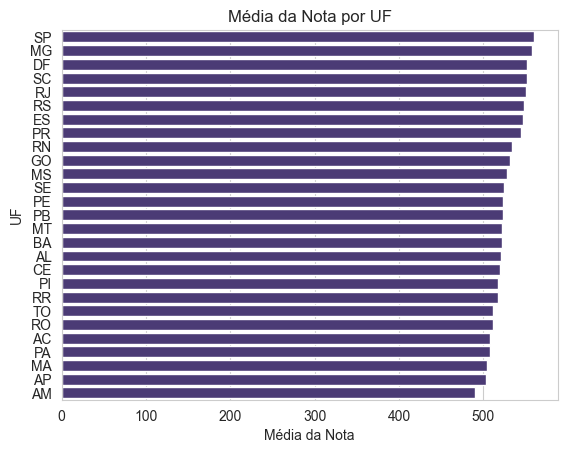

In [158]:
# Média da NOTA_MEDIA por UF (barplot ordenado)
media_uf = df_clean.groupby('SG_UF_PROVA', as_index=False)['NOTA_MEDIA'].mean()
media_uf = media_uf.sort_values('NOTA_MEDIA', ascending=False)
sns.barplot(data=media_uf, y='SG_UF_PROVA', x='NOTA_MEDIA', order=media_uf['SG_UF_PROVA'])
plt.title('Média da Nota por UF')
plt.xlabel('Média da Nota')
plt.ylabel('UF')
plt.show()


### Dados faltantes
Resumo e visualização dos valores ausentes por coluna e padrão de ausência.


In [159]:
# Resumo de NA por coluna
na_counts = df.isna().sum().sort_values(ascending=False)
na_pct = (df.isna().mean().sort_values(ascending=False) * 100).round(2)
na_overview = pd.DataFrame({'n_ausentes': na_counts, 'pct_ausentes': na_pct})
na_overview


,n_ausentes,pct_ausentes
NU_NOTA_CN,1143988,33.75
NU_NOTA_MT,1143988,33.75
NU_NOTA_CH,1011453,29.84
NU_NOTA_REDACAO,1011453,29.84
NU_NOTA_LC,1011453,29.84
NOTA_MEDIA,1003716,29.61
Q024,2,0.00
Q006,2,0.00
Q022,2,0.00
Q001,2,0.00


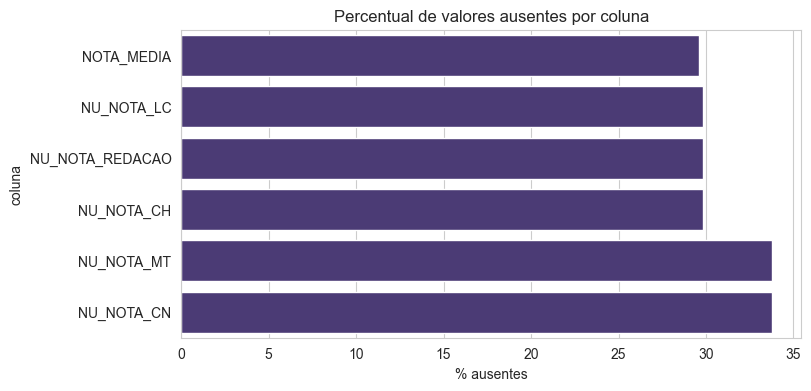

In [160]:
# Visualização: barras de % de ausentes
na_pct_plot = na_pct[na_pct > 0].iloc[::-1]
plt.figure(figsize=(8, max(4, len(na_pct_plot)*0.3)))
sns.barplot(x=na_pct_plot.values, y=na_pct_plot.index, orient='h', color=sns.color_palette()[0])
plt.xlabel('% ausentes')
plt.ylabel('coluna')
plt.title('Percentual de valores ausentes por coluna')
plt.show()


### Duplicatas e integridade de categorias


In [161]:
# Contagem de duplicatas (linhas idênticas)
num_dups = df.duplicated().sum()
print(f"Linhas duplicadas: {num_dups}")

# Integridade de categorias: valores únicos e top-10 frequências
categoricas = ['TP_SEXO','TP_COR_RACA','TP_ST_CONCLUSAO','TP_ESCOLA','SG_UF_PROVA','TP_LINGUA','Q001','Q002','Q006','Q022','Q024','Q025']
for col in categoricas:
    uniq = df[col].nunique(dropna=False)
    print(f"\n{col} -> únicos: {uniq}")
    display(df[col].value_counts(dropna=False).head(10))


Linhas duplicadas: 208255

TP_SEXO -> únicos: 2


TP_SEXO
Feminino     2090526
Masculino    1299306
Name: count, dtype: int64


TP_COR_RACA -> únicos: 7


TP_COR_RACA
Parda                       1457454
Branca                      1362256
Preta                        411302
Não declarado                 71149
Amarela                       68491
Indígena                      19175
Não dispõe da informação          5
Name: count, dtype: int64


TP_ST_CONCLUSAO -> únicos: 4


TP_ST_CONCLUSAO
1    1789372
2    1150857
3     437190
4      12413
Name: count, dtype: int64


TP_ESCOLA -> únicos: 3


TP_ESCOLA
1    2238977
2     958611
3     192244
Name: count, dtype: int64


SG_UF_PROVA -> únicos: 27


SG_UF_PROVA
SP    509954
MG    327829
BA    266194
RJ    238347
CE    220517
PE    193616
PA    185978
RS    150484
PR    144282
GO    136915
Name: count, dtype: int64


TP_LINGUA -> únicos: 2


TP_LINGUA
Inglês      1795038
Espanhol    1594794
Name: count, dtype: int64


Q001 -> únicos: 9


Q001
E      955155
B      638092
C      453042
D      373620
F      308151
H      293412
G      219969
A      148389
NaN         2
Name: count, dtype: int64


Q002 -> únicos: 9


Q002
E      1148575
B       471207
F       411426
D       399095
C       390463
G       380126
A        99094
H        89844
NaN          2
Name: count, dtype: int64


Q006 -> únicos: 18


Q006
Até R$ 1.100,00                   932838
De R$ 1.100,01 até R$ 1.650,00    575943
De R$ 1.650,01 até R$ 2.200,00    432478
De R$ 2.750,01 até R$ 3.300,00    233353
De R$ 2.200,01 até R$ 2.750,00    209943
Nenhuma Renda                     202114
De R$ 3.300,01 até R$ 3.850,00    195709
De R$ 3.850,01 até R$ 4.400,00    151384
De R$ 4.400,01 até R$ 5.500,00     93898
De R$ 5.500,01 até R$ 6.600,00     57492
Name: count, dtype: int64


Q022 -> únicos: 6


Q022
D      1002077
C       964593
E       761580
B       595968
A        65612
NaN          2
Name: count, dtype: int64


Q024 -> únicos: 6


Q024
A      1436524
B      1390647
C       357005
D       136242
E        69412
NaN          2
Name: count, dtype: int64


Q025 -> únicos: 3


Q025
B      3037632
A       352198
NaN          2
Name: count, dtype: int64

### Outliers nas notas (IQR)


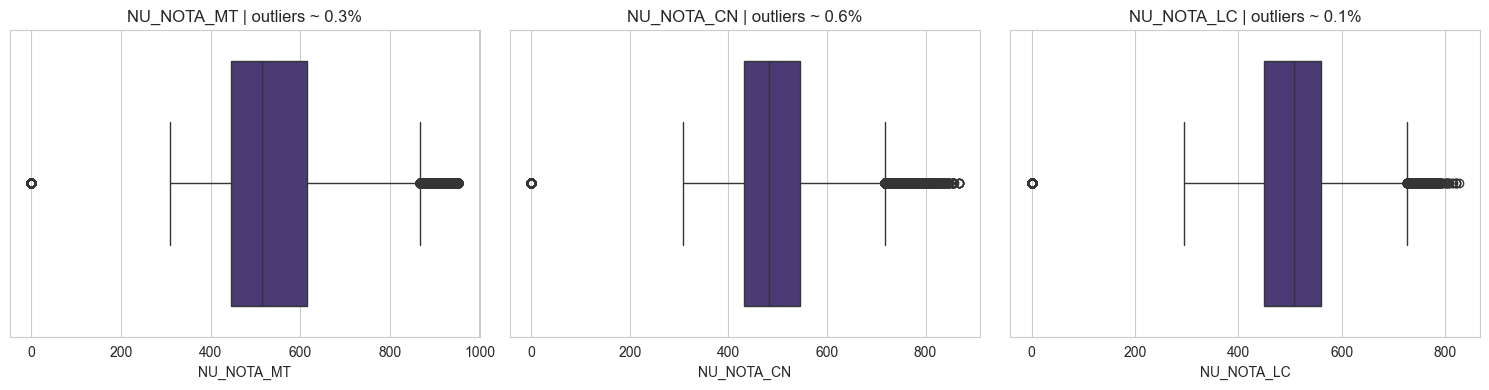

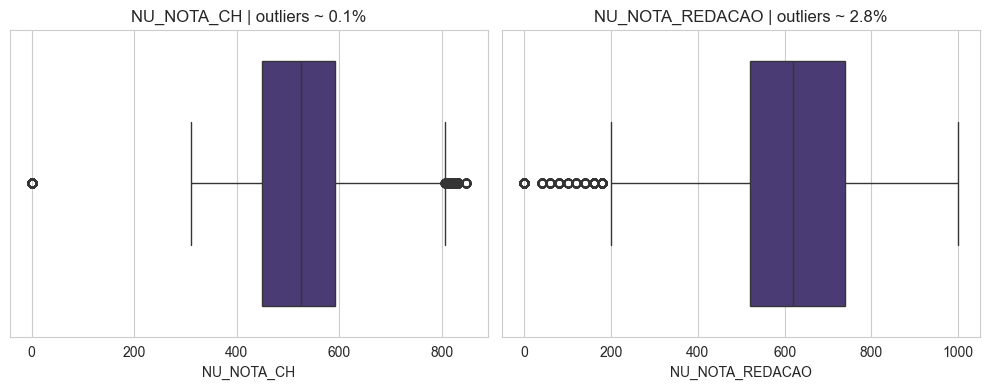

In [162]:
# Cálculo de outliers por IQR e boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, col in zip(axes, ['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_LC']):
    serie = df_clean[col].dropna()
    q1, q3 = serie.quantile(0.25), serie.quantile(0.75)
    iqr = q3 - q1
    lim_inf, lim_sup = q1 - 1.5*iqr, q3 + 1.5*iqr
    outlier_pct = ( (serie < lim_inf) | (serie > lim_sup) ).mean()*100
    sns.boxplot(x=serie, ax=ax)
    ax.set_title(f"{col} | outliers ~ {outlier_pct:.1f}%")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for ax, col in zip(axes, ['NU_NOTA_CH','NU_NOTA_REDACAO']):
    serie = df_clean[col].dropna()
    q1, q3 = serie.quantile(0.25), serie.quantile(0.75)
    iqr = q3 - q1
    lim_inf, lim_sup = q1 - 1.5*iqr, q3 + 1.5*iqr
    outlier_pct = ( (serie < lim_inf) | (serie > lim_sup) ).mean()*100
    sns.boxplot(x=serie, ax=ax)
    ax.set_title(f"{col} | outliers ~ {outlier_pct:.1f}%")
plt.tight_layout()
plt.show()


### Sumários das variáveis categóricas


In [163]:
# Tabelas de frequências relativas e absolutas (top 15)
sumarios = {}
for col in categoricas:
    vc = df[col].value_counts(dropna=False)
    freq_rel = (vc / len(df) * 100).round(2)
    sumarios[col] = pd.DataFrame({'freq_abs': vc, 'freq_%': freq_rel})

# Exibe alguns
display(sumarios['TP_SEXO'].head(15))
display(sumarios['TP_COR_RACA'].head(15))
display(sumarios['Q006'].head(15))


,freq_abs,freq_%
TP_SEXO,,
Feminino,2090526,61.67
Masculino,1299306,38.33


,freq_abs,freq_%
TP_COR_RACA,,
Parda,1457454,42.99
Branca,1362256,40.19
Preta,411302,12.13
Não declarado,71149,2.10
Amarela,68491,2.02
Indígena,19175,0.57
Não dispõe da informação,5,0.00


,freq_abs,freq_%
Q006,,
"Até R$ 1.100,00",932838,27.52
"De R$ 1.100,01 até R$ 1.650,00",575943,16.99
"De R$ 1.650,01 até R$ 2.200,00",432478,12.76
"De R$ 2.750,01 até R$ 3.300,00",233353,6.88
"De R$ 2.200,01 até R$ 2.750,00",209943,6.19
Nenhuma Renda,202114,5.96
"De R$ 3.300,01 até R$ 3.850,00",195709,5.77
"De R$ 3.850,01 até R$ 4.400,00",151384,4.47
"De R$ 4.400,01 até R$ 5.500,00",93898,2.77


### Notas vs demografia (box/violin)


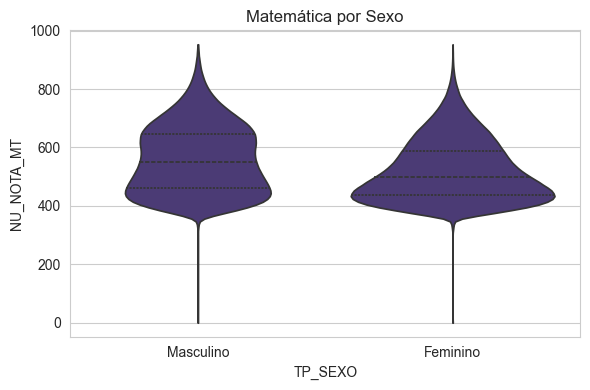

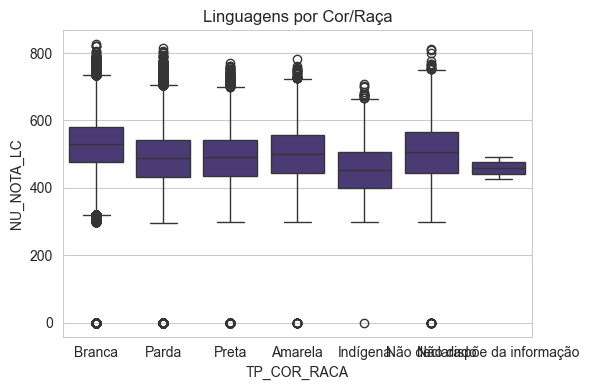

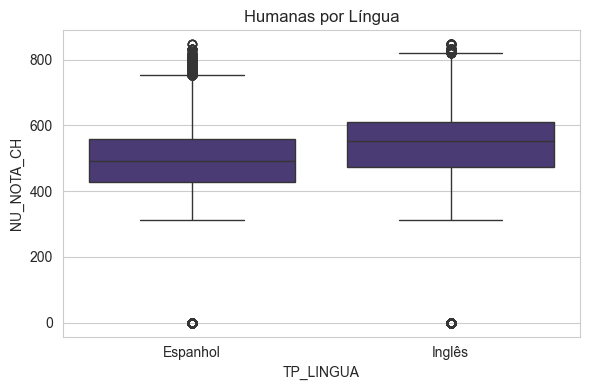

In [164]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=df_clean, x='TP_SEXO', y='NU_NOTA_MT', cut=0, inner='quartile')
plt.title('Matemática por Sexo')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=df_clean, x='TP_COR_RACA', y='NU_NOTA_LC')
plt.title('Linguagens por Cor/Raça')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=df_clean, x='TP_LINGUA', y='NU_NOTA_CH')
plt.title('Humanas por Língua')
plt.tight_layout()
plt.show()


### Socioeconômico vs desempenho (NOTA_MEDIA)


In [165]:
# Mapeia os valores de Q024 para rótulos descritivos
mapa_q024 = {
    'A': 'Não',
    'B': 'Sim, um',
    'C': 'Sim, dois',
    'D': 'Sim, três',
    'E': 'Sim, quatro ou mais'
}
df['Q024'] = df['Q024'].map(mapa_q024)
df_clean['Q024'] = df_clean['Q024'].map(mapa_q024)


# Mapeia os valores de Q025 para rótulos descritivos
mapa_q025 = {
    'A': 'Não',
    'B': 'Sim'
}
df['Q025'] = df['Q025'].map(mapa_q025)
df_clean['Q025'] = df_clean['Q025'].map(mapa_q025)




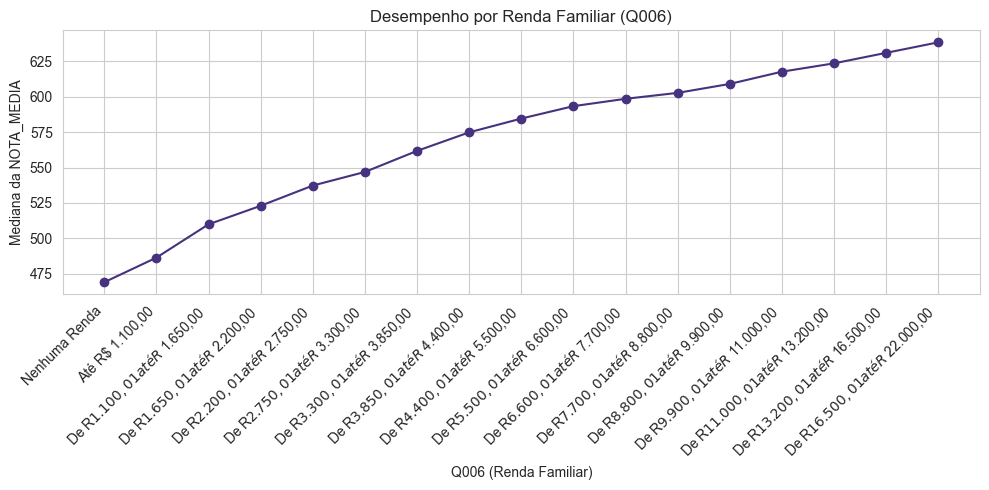

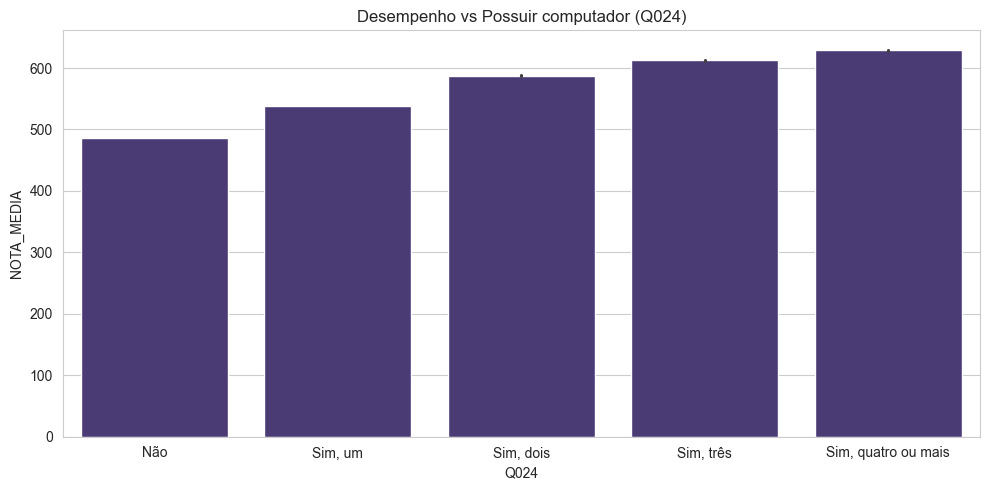

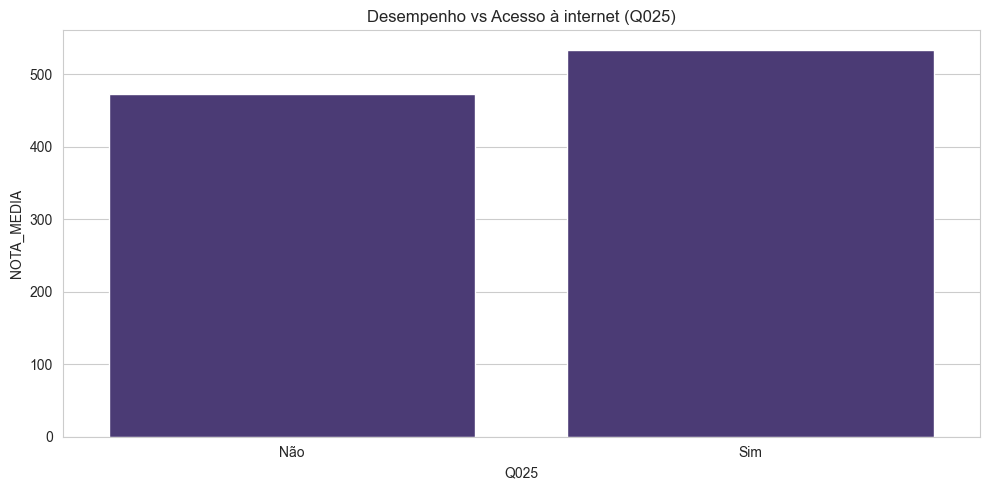

In [ ]:

plt.figure(figsize=(10, 5))
medianas_renda = df_clean.groupby('Q006')['NOTA_MEDIA'].median()
plt.plot(medianas_renda.index, medianas_renda.values, marker='o', linestyle='-')
plt.xticks(rotation=45, ha='right')
plt.title('Desempenho por Renda Familiar (Q006)')
plt.xlabel('Q006 (Renda Familiar)')
plt.ylabel('Mediana da NOTA_MEDIA')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=df_clean, x='Q024', y='NOTA_MEDIA', estimator='median')
plt.title('Desempenho vs Possuir computador (Q024)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=df_clean, x='Q025', y='NOTA_MEDIA', estimator='median')
plt.title('Desempenho vs Acesso à internet (Q025)')
plt.tight_layout()
plt.show()


### Testes estatísticos básicos (ex.: diferença por sexo)


In [167]:
import numpy as np
from scipy import stats

# Exemplo: teste Mann-Whitney (não-paramétrico) para notas de MT por sexo
sub = df_clean.dropna(subset=['TP_SEXO','NU_NOTA_MT'])
if set(sub['TP_SEXO'].unique()) >= {'Masculino','Feminino'}:
    g1 = sub.loc[sub['TP_SEXO']=='Masculino','NU_NOTA_MT']
    g2 = sub.loc[sub['TP_SEXO']=='Feminino','NU_NOTA_MT']
    stat, p = stats.mannwhitneyu(g1, g2, alternative='two-sided')
    print(f"Mann-Whitney MT por sexo: estat={stat:.1f}, p={p:.3e}")

# Exemplo: ANOVA de uma via para NOTA_MEDIA por Q024 (possui computador)
sub2 = df_clean.dropna(subset=['Q024','NOTA_MEDIA'])
grps = [vals['NOTA_MEDIA'].values for _, vals in sub2.groupby('Q024')]
if len(grps) >= 2:
    f, p = stats.f_oneway(*grps)
    print(f"ANOVA NOTA_MEDIA ~ Q024: F={f:.2f}, p={p:.3e}")


Mann-Whitney MT por sexo: estat=709915431530.5, p=0.000e+00
ANOVA NOTA_MEDIA ~ Q024: F=135751.37, p=0.000e+00


### Pairplot das notas


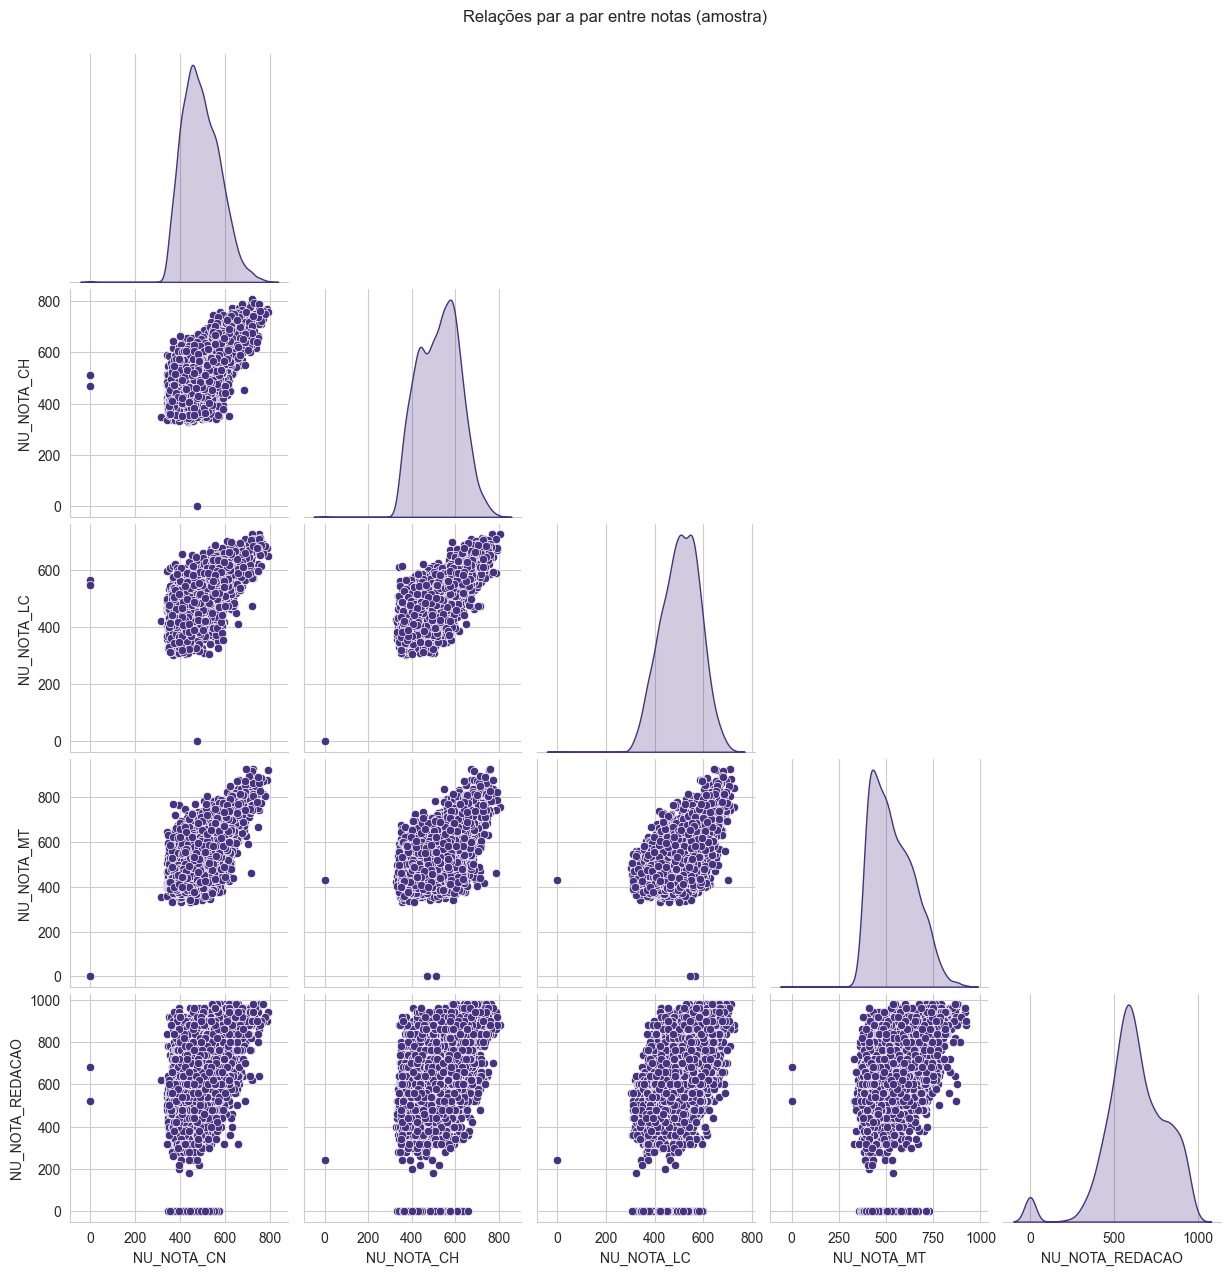

In [168]:
sns.pairplot(df_clean[notas_col].sample(n=min(5000, len(df_clean)), random_state=42), corner=True, diag_kind='kde')
plt.suptitle('Relações par a par entre notas (amostra)', y=1.02)
plt.show()
